
# Alphabet Classification using ANN

This notebook implements a **complete Artificial Neural Network (ANN) pipeline**
for classifying alphabet characters.

The workflow follows a standard ML process:
- Data loading
- Preprocessing
- Model training
- Evaluation
- Visualization

All outputs (models, metrics, plots) are saved to disk.


In [1]:

# ================================
# 1. IMPORTS & BASIC SETUP
# ================================

import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers, models


In [2]:

# ================================
# 2. CREATE PROJECT DIRECTORIES
# ================================

BASE_DIR = os.getcwd()

DIRS = {
    "data_raw": "data/raw",
    "data_processed": "data/processed",
    "models": "models",
    "reports": "reports",
    "output": "output",
    "metrics": "output/metrics",
    "figures": "output/figures"
}

for d in DIRS.values():
    os.makedirs(d, exist_ok=True)

print("Project folders ready:")
for k, v in DIRS.items():
    print("-", v)


Project folders ready:
- data/raw
- data/processed
- models
- reports
- output
- output/metrics
- output/figures



## 3. Load Dataset
The dataset is expected inside `data/raw/Alphabets_data.csv`


In [3]:

DATA_PATH = "data/raw/Alphabets_data.csv"

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError("Dataset not found in data/raw/")

df = pd.read_csv(DATA_PATH)
df.head()


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10



## 4. Preprocessing
- Handle missing values  
- Encode target labels  
- Scale numeric features  


In [4]:

TARGET = "letter"

X = df.drop(columns=[TARGET])
y = df[TARGET]

# Fill missing values
X = X.fillna(X.median())

# Encode labels
y_encoded, class_names = pd.factorize(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save processed data
processed_df = pd.DataFrame(X_scaled, columns=X.columns)
processed_df[TARGET] = y_encoded
processed_df.to_csv("data/processed/alphabets_processed.csv", index=False)

print("Processed data saved.")


Processed data saved.



## 5. Train–Test Split


In [5]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

y_train_oh = tf.keras.utils.to_categorical(y_train)
y_test_oh = tf.keras.utils.to_categorical(y_test)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)


Train shape: (16000, 16)
Test shape : (4000, 16)



## 6. Build ANN Model


In [6]:

model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(y_train_oh.shape[1], activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


c:\Users\pndin\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,938 (27.10 KB)

 Trainable params: 6,938 (27.10 KB)

 Non-trainable params: 0 (0.00 B)


## 7. Train Model


In [7]:

history = model.fit(
    X_train, y_train_oh,
    validation_data=(X_test, y_test_oh),
    epochs=30,
    batch_size=32,
    verbose=1
)


Epoch 1/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5769 - loss: 1.5711 - val_accuracy: 0.7420 - val_loss: 0.8965
Epoch 2/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7869 - loss: 0.7430 - val_accuracy: 0.8048 - val_loss: 0.6636
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8305 - loss: 0.5780 - val_accuracy: 0.8350 - val_loss: 0.5492
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8583 - loss: 0.4788 - val_accuracy: 0.8560 - val_loss: 0.4806
Epoch 5/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8755 - loss: 0.4144 - val_accuracy: 0.8605 - val_loss: 0.4267
Epoch 6/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8889 - loss: 0.3647 - val_accuracy: 0.8785 - val_loss: 0.3826
Epoch 7/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9002 - loss: 0.3241 - val_accuracy: 0.8875 - val_loss: 0.3538
Epoch 8/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9118 - loss: 0.2920 - val_accuracy: 0.


## 8. Save Model


In [8]:

MODEL_PATH = "models/baseline_model.h5"
model.save(MODEL_PATH)
print("Model saved to:", MODEL_PATH)


Model saved to: models/baseline_model.h5



## 9. Evaluation


In [9]:

test_loss, test_acc = model.evaluate(X_test, y_test_oh, verbose=0)

y_pred = np.argmax(model.predict(X_test), axis=1)

report = classification_report(y_test, y_pred, output_dict=True)
cm = confusion_matrix(y_test, y_pred)

metrics = {
    "test_loss": float(test_loss),
    "test_accuracy": float(test_acc),
    "classification_report": report,
    "confusion_matrix": cm.tolist()
}

with open("output/metrics/baseline_metrics.json", "w") as f:
    json.dump(metrics, f, indent=4)

print("Metrics saved.")


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step
Metrics saved.



## 10. Visualizations


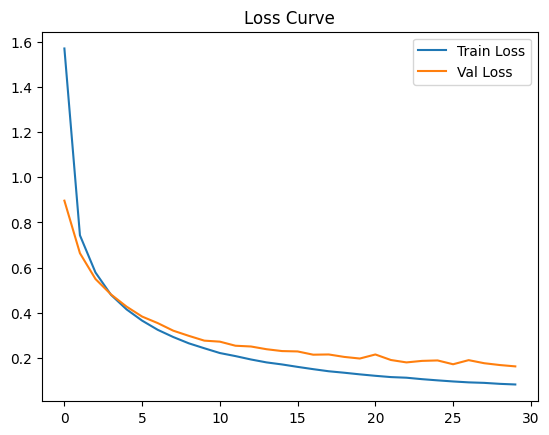

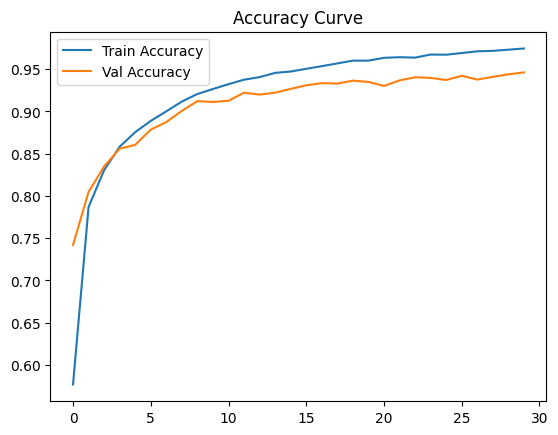

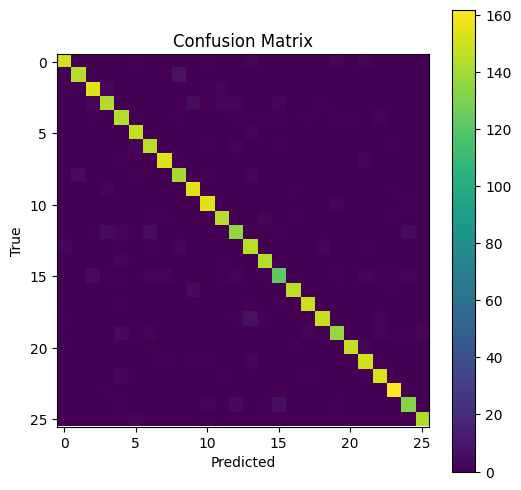

Plots saved.


In [10]:

# Loss Curve
plt.figure()
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss Curve")
plt.savefig("output/figures/loss_curve.png")
plt.show()

# Accuracy Curve
plt.figure()
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Accuracy Curve")
plt.savefig("output/figures/accuracy_curve.png")
plt.show()

# Confusion Matrix
plt.figure(figsize=(6,6))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("output/figures/confusion_matrix.png")
plt.show()

print("Plots saved.")
